# Kaggle_Titanic

>高级编程技术期末大作业实验报告
>
>姓名：刘泳杅	学号：17341113
>
>姓名：廖浩淳	学号：17341096'
>
>日期：2019年6月28日
>
>网址：[Kaggle-Titanic](https://www.kaggle.com/c/titanic)

<img src="https://ws1.sinaimg.cn/large/007RvR0Hly1g4h2lz9qsqj30hs0dct9r.jpg"/>

## 问题初探 

### 分析问题

		泰坦尼克号的沉没是历史上最臭名昭著的沉船事件之一。1912年4月15日，泰坦尼克号在处女航中与冰山相撞，2224名乘客和船员中有1502人丧生。这场轰动性的悲剧震惊了国际社会，并导致了更好的船舶安全规则。这次海难造成人员伤亡的原因之一是没有足够的救生艇供乘客和船员使用。尽管在沉船中幸存下来有一些运气因素，但有些人比其他人更可能存活下来，如妇女、儿童和上层阶级。
		在这个挑战中，我们要求您分析哪些人可能存活。特别是，我们要求您应用机器学习工具来预测哪些乘客在悲剧中幸存下来。

### 导入数据

导入实验数据和必要的库，这次试验主要用到的科学计算库是numpy和pandas，用到的绘图库是matplotlib和seaborn

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 忽略警告
import warnings
warnings.filterwarnings('ignore')

利用pandas库的read_csv直接将训练集和测试集导入程序，并把PassengerId保存起来

In [2]:
train = pd.read_csv(r'.\data\train.csv')
test = pd.read_csv(r'.\data\test.csv')
PassengerId = test['PassengerId']

## 数据分析

### 总体预览

我们先总体观察一下整个数据集。

训练集有891项数据，每项数据包含12个特征。

测试集有418项数据，每项数据包含11个特征。

In [3]:
print ('train.shape: ', train.shape)
print ('test.shape: ', test.shape)

train.shape:  (891, 12)
test.shape:  (418, 11)


我们再把训练集的前五个元素打印出来看一下

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


我们再打印一下整体信息

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


从上可见，数据集包含12个变量

- PassengerId 整型变量，标识乘客的ID，递增变量，对预测无帮助
- Survived 整型变量，标识该乘客是否幸存。0表示遇难，1表示幸存。
- Pclass 整型变量，标识乘客的社会-经济状态，1代表Upper，2代表Middle，3代表Lower
- Name 字符型变量，除包含姓和名以外，还包含Mr. Mrs. Dr.这样的具有西方文化特点的信息
- Sex 字符型变量，标识乘客性别
- Age 整型变量，标识乘客年龄，有缺失值
- SibSp 整型变量，代表兄弟姐妹及配偶的个数。其中Sib代表Sibling也即兄弟姐妹，Sp代表Spouse也即配偶
- Parch 整型变量，代表父母或子女的个数。其中Par代表Parent也即父母，Ch代表Child也即子女
- Ticket 字符型变量，代表乘客的船票号
- Fare 数值型，代表乘客的船票价
- Cabin 字符型，代表乘客所在的舱位，有缺失值
- Embarked 字符型，代表乘客登船口岸，有缺失值

进一步研究我们得到这样的信息
<img src="https://ws1.sinaimg.cn/large/007RvR0Hly1g4gyfmhp6cj30ee06vt95.jpg"/>
<img src="https://ws1.sinaimg.cn/large/007RvR0Hly1g4gygoi9q3j30b606jdfx.jpg"/>
<img src="https://ws1.sinaimg.cn/large/007RvR0Hly1g4gygohglzj308o08it8o.jpg"/>

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 初步分析

首先我们看一看幸存的相对数量

In [7]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

我们看看各项特征之间的相关性

<img src="https://ws1.sinaimg.cn/large/007RvR0Hly1g4ixs251opj30ke0fsq3q.jpg"/>

从上图我们可以看出性别是与存活率相关性最大的特征

**接下来，我们想观察一下各项特征与幸存率的关系，通过绘制直方图可以观察到这种关系。**

性别特征：观察性别与幸存的关系，女性幸存率远高于男性,印证电影里面那句"Lady and chirdren go first."

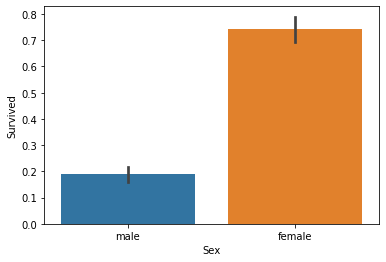

In [8]:
sns.barplot(x="Sex", y="Survived", data=train)

地位特征：观察船舱等级与幸存的关系，发现社会地位越高的人幸存率越高

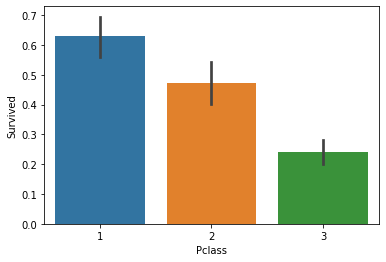

In [9]:
sns.barplot(x="Pclass", y="Survived", data=train)

我们找来了，当时泰坦尼克号的设计图纸，由于船头撞向冰山，船头开始下沉，船身逐渐倾斜，船尾翘起脱离海面；船头沉没1/3时，受自重的影响，船身从中间开始断裂；船尾掉入海中，和船头一起沉没。最终处在中间位置的一等舱程客更有可能幸存
<img src="https://ws1.sinaimg.cn/large/007RvR0Hly1g4gzrr42m1j30hb061wf2.jpg"/>

同辈特征：观察配偶及兄弟姐妹数与幸存的关系，配偶及兄弟姐妹数适中的乘客幸存率更高

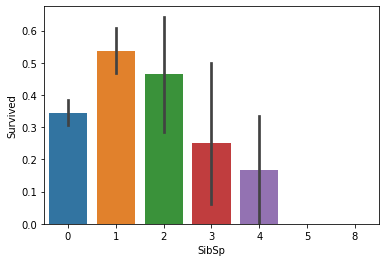

In [10]:
sns.barplot(x="SibSp", y="Survived", data=train)

不同辈特征：观察父母与子女数与幸存的关系，父母与子女数适中的乘客幸存率更高

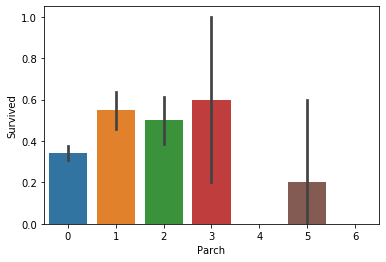

In [11]:
sns.barplot(x="Parch", y="Survived", data=train)

登船口特征：观察登港港口与幸存的关系，C地的生存率更高

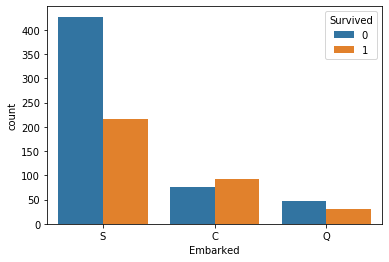

In [12]:
sns.countplot('Embarked',hue='Survived',data=train)

我找来了地图，并标记上SQC三点和泰坦尼克号的失事地点,C点在法国，猜测有可能是C点销售的一等舱的票比较多
<img src="https://ws1.sinaimg.cn/large/007RvR0Hly1g4gzrr3desj30ha06lq3h.jpg"/>

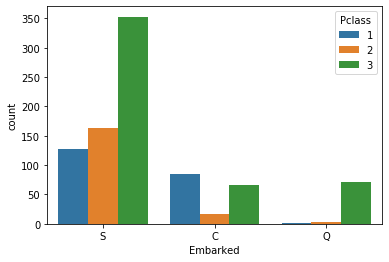

In [13]:
sns.countplot('Embarked',hue='Pclass',data=train)

果不其然，C点销售的一等舱的票数占比是最高的，因此我们猜测登船地点这个特征应该是反映在社会地位上了

我们再绘制出年龄与幸存率的关系图，从不同生还情况的密度图可以看出，年龄小于12岁的程客幸村率有较大幅度的提高，这也印证了那句"Lady and children go first."的台词

Text(12.359751157407416, 0.5, 'density')

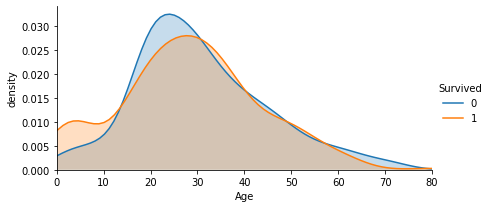

In [14]:
facet = sns.FacetGrid(train, hue="Survived", aspect=2)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlabel('Age')
plt.ylabel('density')

我们再绘制出票价与幸存率的关系图，从生还情况密度图，在票价大于三十时生还的概率比死亡的要高，因此可以把票价较高的个体分离出来当作特征。

Text(12.359751157407416, 0.5, 'density')

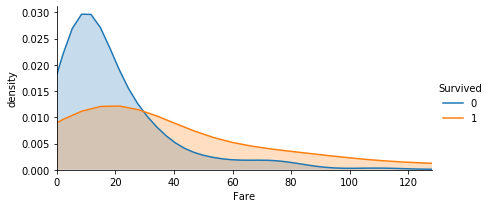

In [15]:
facet = sns.FacetGrid(train, hue="Survived", aspect=2)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()/4))
facet.add_legend()
plt.xlabel('Fare')
plt.ylabel('density')

还可以看出对于票价超高（高于150）的程客来说，生还的概率很大

Text(6.109751157407416, 0.5, 'density')

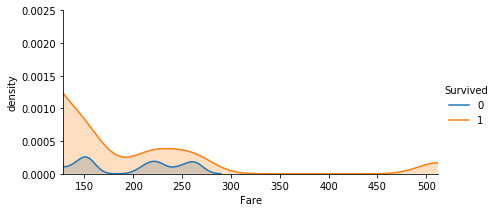

In [16]:
facet = sns.FacetGrid(train, hue="Survived", aspect=2)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(train['Fare'].max()/4, train['Fare'].max()), ylim=(0, 0.0025))
facet.add_legend()
plt.xlabel('Fare')
plt.ylabel('density')

## 特征工程

特征都观察得差不多之后，我们接着做特征工程。

### 新增特征

首先将训练集和测试集合并一起进行操作。

In [17]:
all_data = pd.concat([train, test], ignore_index=True)

观察合并后的all_data前五项数据

In [18]:
all_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


我们目前无法运用姓名这一特征，所以想加入一个头衔特征，从英文名的称谓反应这个人的社会地位。

新增Title特征，从姓名中提取乘客的称呼，归纳为六类。

In [19]:
all_data['Title'] = all_data['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())

观察提取出的头衔，并将头衔归纳成六类

In [20]:
set(all_data['Title'])

{'Capt',
 'Col',
 'Don',
 'Dona',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir',
 'the Countess'}

In [21]:
all_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr


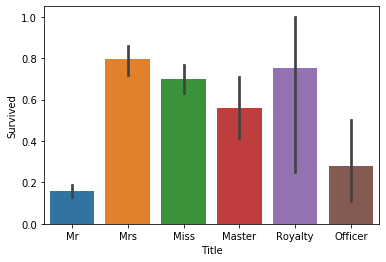

In [22]:
# 将称呼分类
Title_Dict = {}
Title_Dict.update(dict.fromkeys(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer'))
Title_Dict.update(dict.fromkeys(['Don', 'Sir', 'the Countess', 'Dona', 'Lady'], 'Royalty'))
Title_Dict.update(dict.fromkeys(['Mme', 'Ms', 'Mrs'], 'Mrs'))
Title_Dict.update(dict.fromkeys(['Mlle', 'Miss'], 'Miss'))
Title_Dict.update(dict.fromkeys(['Mr'], 'Mr'))
Title_Dict.update(dict.fromkeys(['Master','Jonkheer'], 'Master'))

all_data['Title'] = all_data['Title'].map(Title_Dict)
sns.barplot(x="Title", y="Survived", data=all_data)

观察到头衔称呼为"Mrs", "Miss", "Master", "Royalty"存活率会比较高，这些都是女性和社会地位高的人。

In [23]:
all_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr


现在的sibsp和parch特征都不能很好的反应家庭成员数，家庭成员人数也要作为一个特征，所以我们新增一个FamilyLabel特征。

首先计算家庭总人数：Parch+SibSp+1

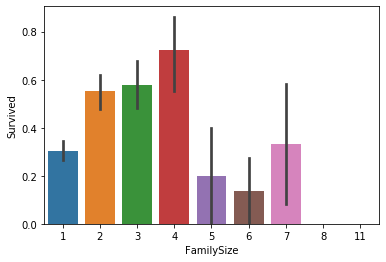

In [24]:
all_data['FamilySize']=all_data['SibSp']+all_data['Parch']+1
sns.barplot(x="FamilySize", y="Survived", data=all_data)

按生存率把FamilySize分为三类，构成FamilyLabel特征。

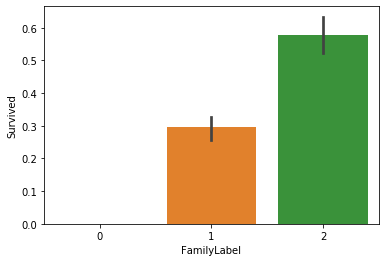

In [25]:
def Fam_label(s):
    if s in [2, 3, 4]:
        return 2
    elif s in [1, 5, 6, 7]:
        return 1
    else:
        return 0
all_data['FamilyLabel'] = all_data['FamilySize'].apply(Fam_label)
sns.barplot(x="FamilyLabel", y="Survived", data=all_data)

Cabin缺失值太多，我们猜测有些程客确实没有舱位，他们可能就在甲板上活动，或者说由于没有幸存下来导致难以获得小舱号；

因此我们首先将缺失值用Unknown填充Cabin的缺失值，然后取出第一个字母作为新增的甲板号

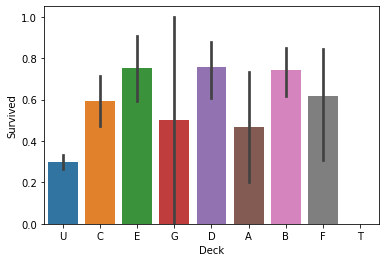

In [26]:
all_data['Cabin'] = all_data['Cabin'].fillna('Unknown')
all_data['Deck']=all_data['Cabin'].str.get(0)
sns.barplot(x="Deck", y="Survived", data=all_data)

团体票：我们在观察数据的时候发现有多人共用一张票的现象，猜测应该是多人购买了团体票，因此我们将票号一样的分别提取出来，观察几人成团会有更高的存活率。

In [27]:
Ticket_Count = dict(all_data['Ticket'].value_counts())

In [28]:
print(Ticket_Count['CA. 2343'])
print(Ticket_Count['CA 2144'])
print(Ticket_Count['W./C. 6608'])

11
8
5


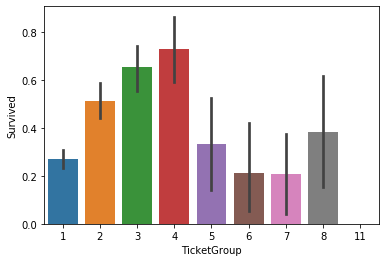

In [29]:
all_data['TicketGroup'] = all_data['Ticket'].apply(lambda x:Ticket_Count[x])
sns.barplot(x='TicketGroup', y='Survived', data=all_data)

我们发现2至4人共票号的乘客幸存率较高，因此我们将团体票人数分成三种类型

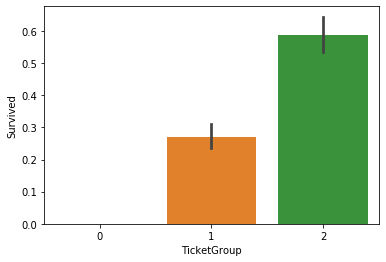

In [30]:
def Ticket_Label(s):
    if s in [2, 3, 4]:
        return 2
    elif s in [1, 5, 6, 7, 8]:
        return 1
    else:
        return 0

all_data['TicketGroup'] = all_data['TicketGroup'].apply(Ticket_Label)
sns.barplot(x='TicketGroup', y='Survived', data=all_data)

### 缺失值填充

**新增了一些特征之后我们要进行缺失值填充**

其中
1. Embarked和Fare缺失值较少，使用众数填充
2. Age缺失值不多不少，我们使用随机森林回归模型进行预测

**Embarked:**

Embarked缺失量为2，我们首先观察确实项的特征。

In [31]:
all_data[all_data['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,FamilySize,FamilyLabel,Deck,TicketGroup
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572,Miss,1,1,B,2
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572,Mrs,1,1,B,2


缺失Embarked信息的乘客的Pclass均为1，且Fare均为80

In [32]:
all_data.groupby(by=["Embarked", "Pclass"]).Fare.median()

Embarked  Pclass
C         1         76.7292
          2         15.3146
          3          7.8958
Q         1         90.0000
          2         12.3500
          3          7.7500
S         1         52.0000
          2         15.3750
          3          8.0500
Name: Fare, dtype: float64

因为Embarked为C且Pclass为1的乘客的Fare中位数为77，最接近80，所以我们将缺失值填充为C。

In [33]:
all_data['Embarked'] = all_data['Embarked'].fillna('C')

**Fare:**

测试集中有一个Fare的缺失项，我们先将其打印出来。

In [34]:
all_data[all_data['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,FamilySize,FamilyLabel,Deck,TicketGroup
1043,60.5,Unknown,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701,Mr,1,1,U,1


观察到此乘客是从S口登船的三等舱程客，我们找到从S口登船的三等舱程客票价的中位数进行缺失值填充。

In [35]:
fare=all_data[(all_data['Embarked'] == "S") & (all_data['Pclass'] == 3)].Fare.median()
all_data['Fare']=all_data['Fare'].fillna(fare)

**Age:**

最难填充的是Age，确实量适中，我们用Sex, Title, Pclass, Embarked, Fare五个特征构建随机森林模型，填充年龄缺失值。

In [36]:
from sklearn.ensemble import RandomForestRegressor
age_df = all_data[['Age', 'Pclass','Sex','Title', 'Embarked', 'Fare']]

In [37]:
age_df.head()

,Age,Pclass,Sex,Title,Embarked,Fare
0,22.0,3,male,Mr,S,7.2500
1,38.0,1,female,Mrs,C,71.2833
2,26.0,3,female,Miss,S,7.9250
3,35.0,1,female,Mrs,S,53.1000
4,35.0,3,male,Mr,S,8.0500


进行one hot编码，使数据易于利用

In [38]:
# one_hot编码, 独热编码
age_df = pd.get_dummies(age_df)

In [39]:
age_df.head()

,Age,Pclass,Fare,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,22.0,3,7.2500,0,1,0,0,1,0,0,0,0,0,1
1,38.0,1,71.2833,1,0,0,0,0,1,0,0,1,0,0
2,26.0,3,7.9250,1,0,0,1,0,0,0,0,0,0,1
3,35.0,1,53.1000,1,0,0,0,0,1,0,0,0,0,1
4,35.0,3,8.0500,0,1,0,0,1,0,0,0,0,0,1


将已知与未知分离，由已知预测未知Age

In [40]:
known_age = age_df[age_df.Age.notnull()].as_matrix()
unknown_age = age_df[age_df.Age.isnull()].as_matrix()
X_known = known_age[:, 1:]
y_known = known_age[:, 0]
X_unknown = unknown_age[:, 1:]
y_unknown = unknown_age[:, 0]

然后进行数据归一化，使数据无量纲化

In [41]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X_known)
X_known = standardScaler.transform(X_known)
X_unknown = standardScaler.transform(X_unknown)

利用随机森林模型，预测未知的Age

In [42]:
rfr = RandomForestRegressor(random_state=0, n_estimators=100, n_jobs=-1)
rfr.fit(X_known, y_known)
predictedAges = rfr.predict(X_unknown)
all_data.loc[ (all_data.Age.isnull()), 'Age' ] = predictedAges 

### 同组识别

我们在前面曾经得出结论，同一家人比较可能共同存活或者遇难，而同意家人的女儿儿童存活的可能性比成年男性要大，因此我们把姓氏相同的乘客划分为同一组，从人数大于一的组中分别提取出每组的妇女儿童和成年男性。

提取出每位乘客的姓氏，并对每种姓氏进行计数

In [43]:
all_data['Surname']=all_data['Name'].apply(lambda x:x.split(',')[0].strip())
Surname_Count = dict(all_data['Surname'].value_counts())

增加家庭特征，填入程客的姓氏

In [44]:
all_data['FamilyGroup'] = all_data['Surname'].apply(lambda x:Surname_Count[x])

观察数据

In [45]:
all_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,FamilySize,FamilyLabel,Deck,TicketGroup,Surname,FamilyGroup
0,22.0,Unknown,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,2,2,U,1,Braund,2
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,2,2,C,2,Cumings,2
2,26.0,Unknown,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,1,1,U,1,Heikkinen,1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,2,2,C,2,Futrelle,2
4,35.0,Unknown,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,1,1,U,1,Allen,2


区分出每一组的妇女儿童和成年男子

In [46]:
Female_Child_Group=all_data.loc[(all_data['FamilyGroup']>=2) & ((all_data['Age']<=12) 
                                   | (all_data['Sex']=='female'))]
Male_Adult_Group=all_data.loc[(all_data['FamilyGroup']>=2) & (all_data['Age']>12) 
                              & (all_data['Sex']=='male')]

发现绝大部分女性和儿童组的平均存活率都为1或0，即同组的女性和儿童要么全部幸存，要么全部遇难。

In [47]:
Female_Child=pd.DataFrame(Female_Child_Group.groupby('Surname')['Survived'].mean().value_counts())
Female_Child.columns=['GroupCount']
Female_Child

,GroupCount
1.000000,115
0.000000,31
0.750000,2
0.333333,1
0.142857,1


Text(0.5, 0, 'AverageSurvived')

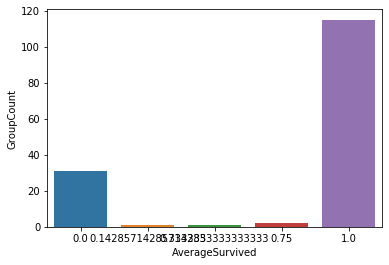

In [48]:
sns.barplot(x=Female_Child.index, y=Female_Child["GroupCount"]).set_xlabel('AverageSurvived')

绝大部分成年男性组的平均存活率也为1或0。

In [49]:
Male_Adult=pd.DataFrame(Male_Adult_Group.groupby('Surname')['Survived'].mean().value_counts())
Male_Adult.columns=['GroupCount']
Male_Adult

,GroupCount
0.000000,122
1.000000,20
0.500000,6
0.333333,2
0.250000,1


### 离群点处理

因为普遍规律是女性和儿童幸存率高，成年男性幸存较低，所以我们把不符合普遍规律的反常组选出来单独处理。把女性和儿童组中幸存率为0的组设置为遇难组，把成年男性组中存活率为1的设置为幸存组，推测处于遇难组的女性和儿童幸存的可能性较低，处于幸存组的成年男性幸存的可能性较高。

In [50]:
Female_Child_Group=Female_Child_Group.groupby('Surname')['Survived'].mean()
Dead_List=set(Female_Child_Group[Female_Child_Group.apply(lambda x:x==0)].index)
print(Dead_List)
Male_Adult_List=Male_Adult_Group.groupby('Surname')['Survived'].mean()
Survived_List=set(Male_Adult_List[Male_Adult_List.apply(lambda x:x==1)].index)
print(Survived_List)

{'Vander Planke', 'Arnold-Franchi', 'Lefebre', 'Rice', 'Turpin', 'Lahtinen', 'Van Impe', 'Caram', 'Olsson', 'Goodwin', 'Jussila', 'Johnston', 'Boulos', 'Ilmakangas', 'Cacic', 'Ford', 'Oreskovic', 'Rosblom', 'Attalah', 'Robins', 'Palsson', 'Sage', 'Strom', 'Danbom', 'Lobb', 'Skoog', 'Panula', 'Zabour', 'Canavan', 'Bourke', 'Barbara'}
{'Beckwith', 'Goldenberg', 'Taylor', 'Cardeza', 'Greenfield', 'Jussila', 'Nakid', 'Bradley', 'Daly', 'Chambers', 'Kimball', 'Beane', 'Frauenthal', 'Harder', 'McCoy', 'Bishop', 'Duff Gordon', 'Dick', 'Jonsson', 'Frolicher-Stehli'}


为了使处于这两种反常组中的样本能够被正确分类，对测试集中处于反常组中的样本的Age，Title，Sex进行惩罚修改。

In [51]:
train=all_data.loc[all_data['Survived'].notnull()]
test=all_data.loc[all_data['Survived'].isnull()]
test.loc[(test['Surname'].apply(lambda x:x in Dead_List)),'Sex'] = 'male'
test.loc[(test['Surname'].apply(lambda x:x in Dead_List)),'Age'] = 60
test.loc[(test['Surname'].apply(lambda x:x in Dead_List)),'Title'] = 'Mr'
test.loc[(test['Surname'].apply(lambda x:x in Survived_List)),'Sex'] = 'female'
test.loc[(test['Surname'].apply(lambda x:x in Survived_List)),'Age'] = 5
test.loc[(test['Surname'].apply(lambda x:x in Survived_List)),'Title'] = 'Miss'

### 特征转换
选取特征，转换为数值变量，划分训练集和测试集。

In [52]:
all_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,FamilySize,FamilyLabel,Deck,TicketGroup,Surname,FamilyGroup
0,22.0,Unknown,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,2,2,U,1,Braund,2
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,2,2,C,2,Cumings,2
2,26.0,Unknown,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,1,1,U,1,Heikkinen,1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,2,2,C,2,Futrelle,2
4,35.0,Unknown,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,1,1,U,1,Allen,2


保留'Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 'FamilyLabel', 'Deck', 'TicketGroup'这几个我们需要的特征，将其他无关特征舍去

In [53]:
all_data=pd.concat([train, test])
all_data=all_data[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 'FamilyLabel', 'Deck', 'TicketGroup']]

In [54]:
all_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilyLabel,Deck,TicketGroup
0,0.0,3,male,22.0,7.2500,S,Mr,2,U,1
1,1.0,1,female,38.0,71.2833,C,Mrs,2,C,2
2,1.0,3,female,26.0,7.9250,S,Miss,1,U,1
3,1.0,1,female,35.0,53.1000,S,Mrs,2,C,2
4,0.0,3,male,35.0,8.0500,S,Mr,1,U,1


将数据特征进行One_hot编码

In [55]:
all_data=pd.get_dummies(all_data)

In [56]:
all_data.head()

,Survived,Pclass,Age,Fare,FamilyLabel,TicketGroup,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Title_Royalty,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U
0,0.0,3,22.0,7.2500,2,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.0,1,38.0,71.2833,2,2,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1.0,3,26.0,7.9250,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.0,1,35.0,53.1000,2,2,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.0,3,35.0,8.0500,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


将训练集与测试集分离

In [57]:
train=all_data[all_data['Survived'].notnull()]
X_test=all_data[all_data['Survived'].isnull()].drop('Survived',axis=1)
X_train = train.as_matrix()[:,1:]
y_train = train.as_matrix()[:,0]

## 建模和优化

### 数据归一化

数据归一化是使数据无量纲化，使不同特征之间具有可比较性

In [58]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)

### PCA降维

进行PCA降维可以提高运算速度，并在一定程度上消除噪音

In [59]:
from sklearn.decomposition import PCA

pca = PCA(0.9)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

选取出能90%程度表示数据的特征，一共有15个

In [60]:
pca.n_components_

15

降维转换

In [61]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

### 参数优化

使用网格搜索寻找最优的随机森林参数n_estimators, max_depth和max_leaf_nodes

In [62]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'max_depth': list(range(3,15)),
        'n_estimators': list(range(20, 45)), 
        'max_leaf_nodes': (2, 4, 8, 16, 32, 64, 128),
    }
]

ran_clf = RandomForestClassifier(random_state = 10, max_features = 'sqrt')

gsearch = GridSearchCV(estimator=ran_clf, param_grid = param_grid, 
                       scoring='roc_auc', n_jobs=-1, verbose=1)

gsearch.fit(X_train,y_train)

Fitting 3 folds for each of 2100 candidates, totalling 6300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 289 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 789 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 1489 tasks      | elapsed:   45.3s
[Parallel(n_jobs=-1)]: Done 2389 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 3489 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 4789 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 6293 out of 6300 | elapsed:  3.3min remaining:    0.1s


Wall time: 3min 16s


[Parallel(n_jobs=-1)]: Done 6300 out of 6300 | elapsed:  3.3min finished


打印出网格搜索的结果

In [63]:
print('Best classify max_depth is ', gsearch.best_params_['max_depth'])
print('Best classify n_estimators is ', gsearch.best_params_['n_estimators'])
print('Best classify max_leaf_nodes is ', gsearch.best_params_['max_leaf_nodes'])
print('Best score is ', gsearch.best_score_)

Best classify max_depth is  6
Best classify n_estimators is  29
Best classify max_leaf_nodes is  32
Best score is  0.8716006774678042


### 训练模型

直接从网格搜索得到最好的分类器，拟合数据

In [64]:
best_clf = gsearch.best_estimator_
best_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='sqrt', max_leaf_nodes=32,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=29,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

### 交叉验证

交叉验证能比较好的反应当前模型对训练集的拟合程度

In [65]:
from sklearn import model_selection, metrics
cv_score = model_selection.cross_val_score(best_clf, X_train, y_train)
print("CV Score : Mean - %.7g | Std - %.7g " % (np.mean(cv_score), np.std(cv_score)))

CV Score : Mean - 0.8237935 | Std - 0.02539553 


### 预测

使用模型预测测试集，然后将预测结果写入一个csv文件，用于上传Kaggle网站进行测试。

In [66]:
y_predict = best_clf.predict(X_test)
submission = pd.DataFrame({"PassengerId": PassengerId, "Survived": y_predict.astype(np.int32)})
submission.to_csv(r".\output\submission1.csv", index=False)

## 上传测试

经过一系列漫长的调参过程之后，我们的准确率来到了83.253%, 处于整个排行榜的前2%，一个很不错的得分，可喜可贺

<img src="https://ws1.sinaimg.cn/large/007RvR0Hly1g4ixgvw3n5j313a08iwes.jpg"/>

<img src="https://ws1.sinaimg.cn/large/007RvR0Hly1g4ixo51dcuj31hc0ptdjg.jpg" width="auto" height="100%" />

## 整体框架

<img src="https://ws1.sinaimg.cn/large/007RvR0Hly1g4iycdvfyjj30u10u042k.jpg"/>

## 心得体会

        因为这次是我们第一次接触到真正的机器学习实战，所以我们选择了一个入门级别的比赛--Kaggle网站上的Titanic；

        我们首先看了很多别人有关机器学习项目的笔记和总结，对机器学习应用的研究过程有了一定的了解，学习了一些有用的模型，掌握了python中帮助我们进行科学运算的库numpy和pandas，帮助我们可视化绘图的库matpylotlib和seaborn，还有机器学习的入门库sklearn。

        在此基础上，我们将主要的精力花在如何构建特征工程上，因为我们清楚最终结果的准确率很大程度上取决于特征工程的构建。我们首先对数据总体预览数据，将多个特征与存活率进行一对一的可视化输出，然后研究他们的相关性，保留有用的特征，想办法把无法直接利用的特征转化成python库可以识别处理的特征，构建特征工程。这个过程中我们要想办法填充缺失值，提取可能有用的特征。

        接下来就是模型构建和优化的部分，这一次我们选择了随机森林这个模型进行分类。随机森林引入了较高的随机性，不容易导致数据过拟合，具有良好的抗噪声能力，并且容易实现并行，提高训练速度。对于随机森林所需要的参数，我们使用网格搜索的方法找到。sklearn这个机器学习库将我们本次大作业所需的模型和算法都封装起来，并提供了相对固定的接口，因此我们使用起来还是很方便的。

        这是一次难得的入门机器学习的实践机会，我们从中学到了很多，受益匪浅。感谢老师一个学期辛苦的教学，感谢助教认真负责地批改每一次作业！